Machine learning model for laptop prices
Author Firas Abu Bader

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [45]:
DataSet = pd.read_csv('https://raw.githubusercontent.com/FirasObieda/MachineLearningModel/main/laptops.csv')
DataSet

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [46]:
DataSet.dropna(inplace = True) #removing NaN
DataSet

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00
11,MSI Thin GF63 12VE-021XES Intel Core i7-12650H...,New,MSI,Thin,Intel Core i7,16,1000,SSD,RTX 4050,15.6,No,1399.00
12,ASUS ROG Strix G15 G513RC-HN088 AMD Ryzen 7 68...,New,Asus,ROG,AMD Ryzen 7,16,512,SSD,RTX 3050,15.6,No,1199.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2153,Razer Blade 15 Base Model FHD Intel Core i7-10...,Refurbished,Razer,Blade,Intel Core i7,16,512,SSD,RTX 3070,15.6,No,1583.39
2154,Razer Blade 17 4K 144Hz Intel Core i9-12900H/3...,Refurbished,Razer,Blade,Intel Core i9,32,1000,SSD,RTX 3080,17.3,No,4699.99
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99


In [47]:
DataSet.isnull().values.any()

False

# Converting Catogertical to Numerical Data

In [48]:
DataSet_Shuffled = DataSet.sample(frac=1,random_state=42).reset_index(drop=True) #Shuffling The Data 
DataSet_Shuffled=DataSet_Shuffled.drop(['Laptop'],axis=1) #too many variance in the Laptop name and it includes information already known in other colums 
DataSet_Shuffled

,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,Refurbished,Gigabyte,Aorus,Intel Core i7,16,512,SSD,RTX 2070,15.6,No,1045.94
1,Refurbished,Gigabyte,Aero,Intel Core i7,16,1000,SSD,RTX 3070,15.6,No,1899.00
2,Refurbished,Asus,ROG,Intel Core i7,16,512,SSD,RTX 2070,15.6,No,1106.34
3,Refurbished,MSI,Creator,Intel Core i7,32,1000,SSD,RTX 2070,15.6,No,1592.89
4,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,RTX A1000,16.0,No,3327.92
...,...,...,...,...,...,...,...,...,...,...,...
776,New,MSI,Stealth,Intel Core i7,16,1000,SSD,RTX 4060,15.6,No,1799.00
777,New,HP,Victus,Intel Core i7,16,1000,SSD,RTX 3050,16.1,No,1299.01
778,New,Samsung,Galaxy Book,Intel Evo Core i9,32,1000,SSD,RTX 4070,16.0,No,3699.01
779,New,Deep Gaming,Nubian,Intel Core i7,64,2000,SSD,RTX 3050,15.6,No,1615.00


In [49]:
DataSet_Shuffled=pd.get_dummies(DataSet_Shuffled, columns=["Status","Brand","Model","CPU","Storage type","GPU","Touch"])
DataSet_Shuffled

,RAM,Storage,Screen,Final Price,Status_New,Status_Refurbished,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Deep Gaming,...,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes
0,16,512,15.6,1045.94,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,16,1000,15.6,1899.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16,512,15.6,1106.34,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,32,1000,15.6,1592.89,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16,512,16.0,3327.92,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,16,1000,15.6,1799.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
777,16,1000,16.1,1299.01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
778,32,1000,16.0,3699.01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
779,64,2000,15.6,1615.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Assigning X and Y 

In [50]:
X = DataSet_Shuffled.drop(['Final Price'], axis=1)
Y = DataSet_Shuffled['Final Price']

# Spliting the Data 80 / 20 

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Machine Learning Process
# 1-Linear Regression 

In [69]:
Linear = LinearRegression()
Linear.fit(X_train, y_train)
Y_Linear_train_pred = Linear.predict(X_train)
Y_Linear_test_pred = Linear.predict(X_test)

In [70]:
#Showing Preformance 
Linear_train_mse = mean_squared_error(Y_train, Y_Linear_train_pred)
Linear_train_r2 = r2_score(Y_train, Y_Linear_train_pred)
Linear_test_mse = mean_squared_error(Y_test, Y_Linear_test_pred)
Linear_test_r2 = r2_score(Y_test, Y_Linear_test_pred)
Linear_results = pd.DataFrame(['Linear regression',Linear_train_mse, Linear_train_r2, Linear_test_mse, Linear_test_r2]).transpose()
Linear_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
Linear_results.columns
Linear_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,122081.749712,0.884628,159572.713559,0.820392


Text(0.5, 0, 'Experimental Final Price')

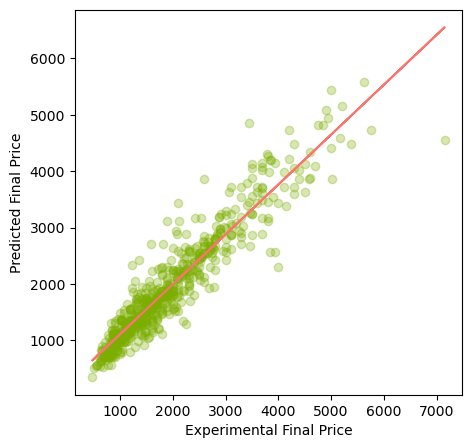

In [75]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=Y_Linear_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, Y_Linear_train_pred, 1)
p = np.poly1d(z)
plt.plot(Y_train,p(Y_train),"#F8766D")
plt.ylabel('Predicted Final Price')
plt.xlabel('Experimental Final Price')

# 2-Random Forest Regression 